The Basic ML Workflow
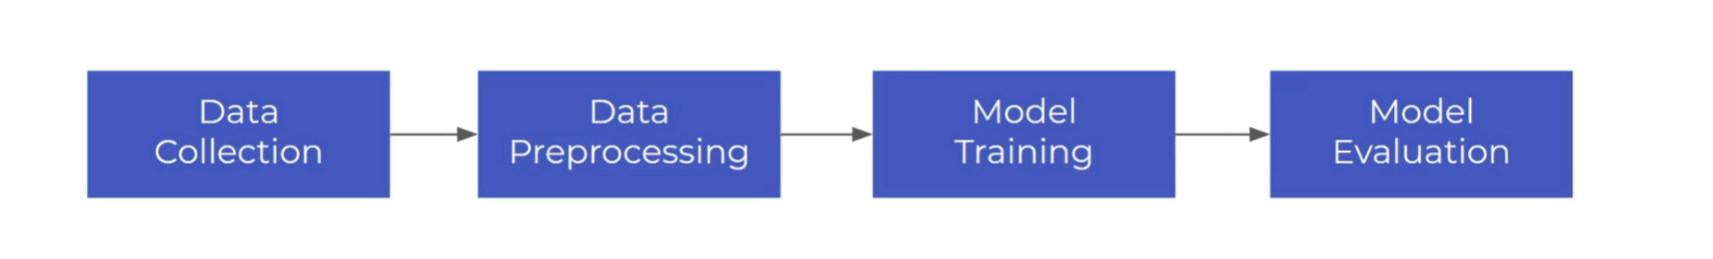

Data are collected from the Kaggle and loaded using pandas read_csv </br> 
https://www.kaggle.com/datasets/parisrohan/credit-score-classification?resource=download

# Data Collection 

In [162]:
import warnings
warnings.filterwarnings('ignore')

In [163]:
# Libraries 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
# we want to see evey collection 
pd.set_option('display.max_columns', None)


In pandas, the low_memory parameter is used in the read_csv() function to indicate whether the function should try to automatically infer the data type of each column based on its content, or whether it should read the entire data set as the same data type to save memory. By default, low_memory is set to True, which means that pandas will try to infer the data types of the columns as it reads the data.

Setting low_memory to False can be useful in some cases where the data set is very large or has many columns with varying data types. In these cases, pandas may not be able to infer the correct data type for each column, which can result in the wrong data being loaded into memory. Setting low_memory to False forces pandas to read the entire data set as the same data type, which can help avoid these issues.

However, setting low_memory to False can also lead to much higher memory usage, as the entire data set will be loaded into memory at once. This can be problematic if the data set is very large and you do not have enough memory available on your computer. Therefore, it is generally recommended to leave low_memory set to its default value of True unless you have a specific reason to change it.

In [164]:
train_df = pd.read_csv("../dataset/train.csv", low_memory=False) 
test_df = pd.read_csv("../dataset/test.csv", low_memory=False)

In [165]:
train_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [166]:
train_df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

The Problem are with the following columns 
- Age 
- Num_of_Loan 
- Num_of_Delayed_Payment 
- Changed_Credit_Limit     
- Outstanding_Debt  
- Credit_History_Age
- Amount_invested_monthly
- Monthly_Balance

In [167]:
# Percentage of missing values 
train_df.isna().sum() / len(train_df) * 100

ID                           0.000
Customer_ID                  0.000
Month                        0.000
Name                         9.985
Age                          0.000
SSN                          0.000
Occupation                   0.000
Annual_Income                0.000
Monthly_Inhand_Salary       15.002
Num_Bank_Accounts            0.000
Num_Credit_Card              0.000
Interest_Rate                0.000
Num_of_Loan                  0.000
Type_of_Loan                11.408
Delay_from_due_date          0.000
Num_of_Delayed_Payment       7.002
Changed_Credit_Limit         0.000
Num_Credit_Inquiries         1.965
Credit_Mix                   0.000
Outstanding_Debt             0.000
Credit_Utilization_Ratio     0.000
Credit_History_Age           9.030
Payment_of_Min_Amount        0.000
Total_EMI_per_month          0.000
Amount_invested_monthly      4.479
Payment_Behaviour            0.000
Monthly_Balance              1.200
Credit_Score                 0.000
dtype: float64

In [168]:
# Concatinating both data as there are large number of missing values 
df = pd.concat([train_df, test_df], ignore_index = True )

In [169]:
df.isna().sum() / len(df) * 100

ID                           0.000000
Customer_ID                  0.000000
Month                        0.000000
Name                        10.000000
Age                          0.000000
SSN                          0.000000
Occupation                   0.000000
Annual_Income                0.000000
Monthly_Inhand_Salary       15.000000
Num_Bank_Accounts            0.000000
Num_Credit_Card              0.000000
Interest_Rate                0.000000
Num_of_Loan                  0.000000
Type_of_Loan                11.408000
Delay_from_due_date          0.000000
Num_of_Delayed_Payment       7.000000
Changed_Credit_Limit         0.000000
Num_Credit_Inquiries         2.000000
Credit_Mix                   0.000000
Outstanding_Debt             0.000000
Credit_Utilization_Ratio     0.000000
Credit_History_Age           9.000000
Payment_of_Min_Amount        0.000000
Total_EMI_per_month          0.000000
Amount_invested_monthly      4.500000
Payment_Behaviour            0.000000
Monthly_Bala

In [170]:
# The number of information particularly increases 

In [171]:
df.select_dtypes('O').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   ID                       150000 non-null  object
 1   Customer_ID              150000 non-null  object
 2   Month                    150000 non-null  object
 3   Name                     135000 non-null  object
 4   Age                      150000 non-null  object
 5   SSN                      150000 non-null  object
 6   Occupation               150000 non-null  object
 7   Annual_Income            150000 non-null  object
 8   Num_of_Loan              150000 non-null  object
 9   Type_of_Loan             132888 non-null  object
 10  Num_of_Delayed_Payment   139500 non-null  object
 11  Changed_Credit_Limit     150000 non-null  object
 12  Credit_Mix               150000 non-null  object
 13  Outstanding_Debt         150000 non-null  object
 14  Credit_History_Age  

In [172]:
for col in df.columns:
    print('Column Name: '+col)
    print("**"*20)
    print(df[col].value_counts(dropna=False))
    print('END', "--"*18, '\n')

Column Name: ID
****************************************
ID
0x1602     1
0x162e     1
0x25fea    1
0x25feb    1
0x25fec    1
          ..
0x13afa    1
0x13afb    1
0x13afc    1
0x13afd    1
0x25ff1    1
Name: count, Length: 150000, dtype: int64
END ------------------------------------ 

Column Name: Customer_ID
****************************************
Customer_ID
CUS_0xd40     12
CUS_0x9bf4    12
CUS_0x5ae3    12
CUS_0xbe9a    12
CUS_0x4874    12
              ..
CUS_0x2eb4    12
CUS_0x7863    12
CUS_0x9d89    12
CUS_0xc045    12
CUS_0x942c    12
Name: count, Length: 12500, dtype: int64
END ------------------------------------ 

Column Name: Month
****************************************
Month
January      12500
February     12500
March        12500
April        12500
May          12500
June         12500
July         12500
August       12500
September    12500
October      12500
November     12500
December     12500
Name: count, dtype: int64
END ------------------------------------ 



Monthly_Balance
NaN                                 1762
__-333333333333333333333333333__      15
600.1125089726384                      1
120.54247208897846                     1
784.0174708573453                      1
                                    ... 
279.9825060023594                      1
260.67157274114965                     1
250.4915113003876                      1
243.8753153006728                      1
360.37968260123847                     1
Name: count, Length: 148225, dtype: int64
END ------------------------------------ 

Column Name: Credit_Score
****************************************
Credit_Score
Standard    53174
NaN         50000
Poor        28998
Good        17828
Name: count, dtype: int64
END ------------------------------------ 



Some Unwanted Values in the datasets 
- !@9#%8- 11400 in the Payment_Behaviour
- #F%$D@*&8 - 2829 in the SSN 
- NaN values in various columns  

In [173]:
df = df.applymap(lambda x: x if x is np.NaN or not isinstance(x, str) else str(x).strip('_ ,"')
                      ).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)


In [174]:
df.head(3)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,NaN,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good


In [175]:
df.isna().sum() / len(df) * 100

ID                           0.000000
Customer_ID                  0.000000
Month                        0.000000
Name                        10.000000
Age                          0.000000
SSN                          5.600000
Occupation                   7.000000
Annual_Income                0.000000
Monthly_Inhand_Salary       15.000000
Num_Bank_Accounts            0.000000
Num_Credit_Card              0.000000
Interest_Rate                0.000000
Num_of_Loan                  0.000000
Type_of_Loan                11.408000
Delay_from_due_date          0.000000
Num_of_Delayed_Payment       7.000000
Changed_Credit_Limit         2.100000
Num_Credit_Inquiries         2.000000
Credit_Mix                  20.000000
Outstanding_Debt             0.000000
Credit_Utilization_Ratio     0.000000
Credit_History_Age           9.000000
Payment_of_Min_Amount        0.000000
Total_EMI_per_month          0.000000
Amount_invested_monthly      4.500000
Payment_Behaviour            7.600000
Monthly_Bala

In [176]:
df['ID'] = df.ID.apply(lambda x: int(x, 16))

In [190]:
df['Age'] = df.Age.astype(int)     

In [177]:
df['Customer_ID'] = df.Customer_ID.apply(lambda x: int(x[4:], 16))

In [178]:
df['Month'] = pd.to_datetime(df.Month, format='%B').dt.month


In [179]:
df['SSN'] = df.SSN.apply(lambda x: x if x is np.NaN else int(str(x).replace('-', ''))).astype(float)

In [180]:
df['Annual_Income'] = df.Annual_Income.astype(float)

In [181]:
df['Num_of_Delayed_Payment'] = df.Num_of_Delayed_Payment.astype(float)

In [182]:
df['Changed_Credit_Limit'] = df.Changed_Credit_Limit.astype(float)

In [183]:
df['Outstanding_Debt'] = df.Outstanding_Debt.astype(float)

In [184]:
df['Amount_invested_monthly'] = df.Amount_invested_monthly.astype(float)

In [185]:
df['Monthly_Balance'] = df.Monthly_Balance.astype(float)

In [186]:
# define a function to convert the credit history age  to the number of months
def duration_to_months(duration):
    if pd.isna(duration):
        return np.nan
    else:
        years, months = duration.split(' Years and ')
        months = months.strip(' Months')
        return int(years) * 12 + int(months)

In [187]:
# Handling Credit History Age 
train_df['Credit_History_Age'] = train_df['Credit_History_Age'].apply(duration_to_months)

In [188]:
df.groupby('Customer_ID')["Credit_History_Age"].apply(list)

Customer_ID
1006     [15 Years and 2 Months, 15 Years and 3 Months,...
1007     [28 Years and 10 Months, 28 Years and 11 Month...
1008     [24 Years and 4 Months, 24 Years and 5 Months,...
1009     [27 Years and 7 Months, 27 Years and 8 Months,...
1011     [14 Years and 11 Months, 15 Years and 0 Months...
                               ...                        
50984    [13 Years and 1 Months, 13 Years and 2 Months,...
50990    [5 Years and 10 Months, 5 Years and 11 Months,...
50992    [13 Years and 3 Months, 13 Years and 4 Months,...
50996    [17 Years and 2 Months, 17 Years and 3 Months,...
50999    [18 Years and 10 Months, 18 Years and 11 Month...
Name: Credit_History_Age, Length: 12500, dtype: object

In [189]:
def Reassign_Group_Object_NaN_Values(df, groupby, column, inplace=True):      
    import scipy.stats as stats
    # Assigning Wrong values Make Simple Function
    def make_NaN_and_fill_mode(df, groupby, column, inplace=True):
        # Assign None to np.NaN
        if df[column].isin([None]).sum():
            df[column][df[column].isin([None])] = np.NaN
            
        # fill with local mode
        result = df.groupby(groupby)[column].transform(lambda x: x.fillna(stats.mode(x)[0][0]))

        # inplace
        if inplace:
            df[column]=result
        else:
            return result
    
    # Run      
    if inplace:  
        # Before Assigning Wrong values      
        x = df[column].value_counts(dropna=False).head(1)
        print(f'\nBefore Assigning NaN {column}:', [x if x.index[0] is np.NaN or x.index[0] is None else 'No NaN Value'] , end='\n')
        a = df.groupby(groupby)[column].apply(list) 
        print(f'\nBefore Assigning Example {column}:\n', *a.head().values, sep='\n', end='\n')
        
        # Assigning
        make_NaN_and_fill_mode(df, groupby, column, inplace)
        
        # After Assigning Wrong values
        y = df[column].value_counts(dropna=False).head(1)
        print(f'\nAfter Assigning NaN {column}:', [y if y.index[0] is np.NaN or x.index[0] is None else 'No NaN Value'] , end='\n')
        b = df.groupby(groupby)[column].apply(list)
        print(f'\nAfter Assigning Example {column}:\n', *b.head().values, sep='\n', end='\n')
    else:   
        # Show
        return make_NaN_and_fill_mode(df, groupby, column, inplace)

In [122]:
df['Name'].unique()

array(['Aaron Maashoh', nan, 'Rick Rothackerj', ..., 'Chris Wickhamm',
       'Sarah McBridec', 'Nicks'], dtype=object)

In [113]:
train_df['Age'] = pd.to_numeric(train_df['Age'], errors = 'coerce')
train_df['Annual_Income'] = pd.to_numeric(train_df['Annual_Income'], errors = 'coerce')
train_df['Num_of_Loan'] = pd.to_numeric(train_df['Num_of_Loan'], errors = 'coerce')
train_df['Num_of_Delayed_Payment'] = pd.to_numeric(train_df['Num_of_Delayed_Payment'], errors = 'coerce')
train_df['Changed_Credit_Limit'] = pd.to_numeric(train_df['Changed_Credit_Limit'], errors = 'coerce')
train_df['Outstanding_Debt'] = pd.to_numeric(train_df['Outstanding_Debt'], errors = 'coerce')
train_df['Amount_invested_monthly'] = pd.to_numeric(train_df['Amount_invested_monthly'], errors = 'coerce')
train_df['Monthly_Balance'] = pd.to_numeric(train_df['Monthly_Balance'], errors = 'coerce')

In [114]:
# define a function to convert the credit history age  to the number of months
def duration_to_months(duration):
    if pd.isna(duration):
        return np.nan
    else:
        years, months = duration.split(' Years and ')
        months = months.strip(' Months')
        return int(years) * 12 + int(months)
# Handling Credit History Age 
train_df['Credit_History_Age'] = train_df['Credit_History_Age'].apply(duration_to_months)
# Handling Age 
train_df['Age'] = train_df['Age'].apply(lambda x: np.nan if x < 0 or x > 122 else x)


In [117]:
# handling SSN 
train_df['SSN'] = train_df['SSN'].replace('#F%$D@*&8', np.nan)

In [121]:
train_df['Customer_ID'].unique()

array(['CUS_0xd40', 'CUS_0x21b1', 'CUS_0x2dbc', ..., 'CUS_0xaf61',
       'CUS_0x8600', 'CUS_0x942c'], dtype=object)

In [120]:
train_df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                          7624
SSN                          5572
Occupation                      0
Annual_Income                6980
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                  4785
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       9746
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt             1009
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      8784
Payment_Behaviour               0
Monthly_Balance              1209
Credit_Score                    0
dtype: int64

# Basic Statistics of the data 

In [5]:
train_df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [7]:
print(f"Training Data:\nno of rows: {train_df.shape[0]}\nno of columns: {train_df.shape[1]}")
print()
print(f"Testing Data:\nno of rows: {test_df.shape[0]}\nno of columns: {test_df.shape[1]}")


Training Data:
no of rows: 100000
no of columns: 28

Testing Data:
no of rows: 50000
no of columns: 27


The testing data doesn't contain the target variable <b> Credit Score </b> 

In [19]:
train_df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [18]:
train_df.dtypes.value_counts()

object     20
float64     4
int64       4
dtype: int64

In [ ]:
# From the 

In [15]:
train_df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

## Checking missing values in the dataset 

In [21]:
missing_train = train_df.isna().sum()/len(train_df) * 100  #percentage of missing value  in trainining dataset 
missing_test = test_df.isna().sum()/len(test_df) * 100 # percentage of missing value in testing dataset 

In [28]:
missing_train_sorted =missing_train.sort_values(ascending = False)
missing_test_sorted = missing_test.sort_values(ascending= False)

In [29]:
missing_train_sorted

Monthly_Inhand_Salary       15.002
Type_of_Loan                11.408
Name                         9.985
Credit_History_Age           9.030
Num_of_Delayed_Payment       7.002
Amount_invested_monthly      4.479
Num_Credit_Inquiries         1.965
Monthly_Balance              1.200
ID                           0.000
Changed_Credit_Limit         0.000
Payment_Behaviour            0.000
Total_EMI_per_month          0.000
Payment_of_Min_Amount        0.000
Credit_Utilization_Ratio     0.000
Outstanding_Debt             0.000
Credit_Mix                   0.000
Delay_from_due_date          0.000
Customer_ID                  0.000
Num_of_Loan                  0.000
Interest_Rate                0.000
Num_Credit_Card              0.000
Num_Bank_Accounts            0.000
Annual_Income                0.000
Occupation                   0.000
SSN                          0.000
Age                          0.000
Month                        0.000
Credit_Score                 0.000
dtype: float64

In [30]:
missing_test_sorted

Monthly_Inhand_Salary       14.996
Type_of_Loan                11.408
Name                        10.030
Credit_History_Age           8.940
Num_of_Delayed_Payment       6.996
Amount_invested_monthly      4.542
Num_Credit_Inquiries         2.070
Monthly_Balance              1.124
Annual_Income                0.000
Credit_Mix                   0.000
Payment_Behaviour            0.000
Month                        0.000
Total_EMI_per_month          0.000
Payment_of_Min_Amount        0.000
Age                          0.000
Credit_Utilization_Ratio     0.000
Outstanding_Debt             0.000
SSN                          0.000
Num_Bank_Accounts            0.000
Changed_Credit_Limit         0.000
Occupation                   0.000
Delay_from_due_date          0.000
Customer_ID                  0.000
Num_of_Loan                  0.000
Interest_Rate                0.000
Num_Credit_Card              0.000
ID                           0.000
dtype: float64

Both training and testing dataset have missing values with <b>Monthly_Inhand_Salary</b> with more missing percentile in both. Further analysis needs to be done to be able to say what needs to be done with this missing values 

In [31]:
train_columns = train_df.columns 
test_columns = test_df.columns 
print(train_columns)

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')


Corelation heatmap for datasets

/tmp/ipykernel_23566/608966649.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train_df.corr()


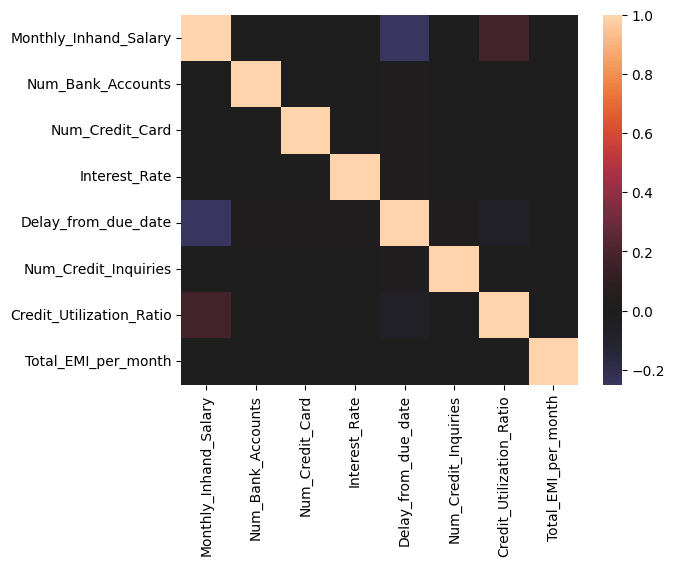

In [33]:
# Create a correlation matrix and display it as a heatmap
corr = train_df.corr()
sns.heatmap(corr, center=0)
plt.show()

In [39]:
X = train_df.drop('Credit_Score', axis = 1)
y = train_df['Credit_Score']

In [41]:
#finding the correlation of the various features with the Credit_Score 
corr_matrix = X.corrwith(y)
corr_series = corr_matrix['Credit_Score'].sort_values(ascending=False)

corr_series

/tmp/ipykernel_23566/4243818130.py:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = X.corrwith(y)


TypeError: unsupported operand type(s) for /: 'str' and 'int'